In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
data = pd.read_csv(r"C:\Users\prana\Downloads\tvmarketing.csv")

In [3]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [45]:
# Apply Min-Max Normalization
df_normalized = data.copy()
df_normalized["TV"] = (data["TV"] - data["TV"].min()) / (data["TV"].max() - data["TV"].min())
df_normalized["Sales"] = (data["Sales"] - data["Sales"].min()) / (data["Sales"].max() - data["Sales"].min())

# Display the first few rows of the normalized dataset
df_normalized.head()


,TV,Sales
0,0.775786,0.807087
1,0.148123,0.346457
2,0.055800,0.303150
3,0.509976,0.665354
4,0.609063,0.444882


In [66]:
X_train,X_test,y_train,y_test = train_test_split(data["TV"],data["Sales"],test_size=0.2,random_state=40)

In [67]:
X_train.shape

(160,)

In [68]:
lr = LinearRegression()

In [69]:
print(X_train.shape, y_train.shape)


(160,) (160,)


In [70]:
# Ensure X_train is a DataFrame and y_train is a 2D array
X_train = X_train.to_frame() if isinstance(X_train, pd.Series) else X_train
y_train = y_train.values.reshape(-1, 1)  # Convert to 2D array

In [71]:
X_train.shape

(160, 1)

In [72]:
lr.fit(X_train,y_train)

LinearRegression()

In [73]:
X_test = pd.DataFrame(X_test, columns=['TV'])  # Ensure column name is the same
y_test = pd.DataFrame(y_test, columns=['Sales'])  # Ensure column name is the same

In [74]:
y_pred = lr.predict(X_test)

In [75]:
r2 = r2_score(y_test,y_pred)

In [76]:
r2

0.5747439963247202

In [77]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 2.5789105610443546


In [78]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 11.68866891036945


In [79]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

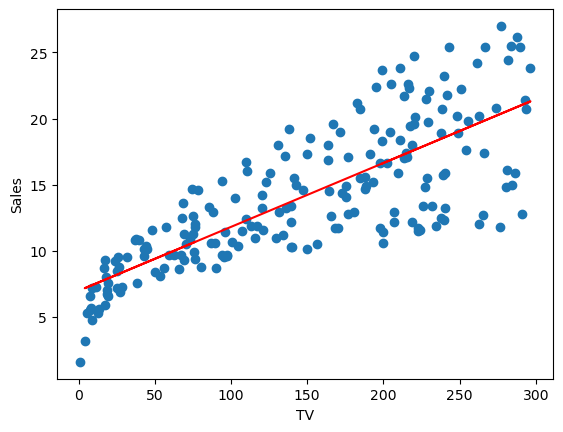

In [80]:
plt.scatter(data['TV'],data['Sales'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('TV')
plt.ylabel('Sales')